# Teachbooks features in this book

What is this

<!-- <iframe src="https://slides.com/nareshkumardevulapally/cvip-logistics/embed?style=light&share=hidden" width="576" height="420" title="cvip-logistics" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe> -->

<div>
    <iframe src="https://slides.com/nareshkumardevulapally/cvip-logistics/embed?style=light&share=hidden" 
        width="100%"
        height="500"
        title="cvip-logistics" 
        scrolling="no" 
        frameborder="0" 
        webkitallowfullscreen 
        mozallowfullscreen 
        allowfullscreen>
    </iframe>
</div>

<!-- 
<div>
<iframe src="/slides/slides_slides-ai/index.html" width="100%" height="500" title="Test Title" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>
</div> -->

### Why I Use Reveal.js for Slides

- **Web-Hosted & Accessible** – Students can view slides online without downloading files.
- **Interactive & Engaging** – Built-in animations and transitions enhance presentation flow.
- **Customizable & Flexible** – Supports Markdown, HTML, and JavaScript for tailored content.
- **Mobile & Cross-Platform** – Works on any device with a web browser.
- **Live Code & Plugins** – Supports code execution, speaker notes, and powerful plugins.
- **Version Control Friendly** – Easily track changes using Git.

Reveal.js makes presentations dynamic, shareable, and tech-friendly!

The discrete convolution operation is mathematically defined as:

$$
y(i,j) = \sum_{m=-k}^{k} \sum_{n=-k}^{k} x(i+m, j+n) h(m,n)
$$

- $ y(i,j) $ → The output pixel value at location $ (i,j)$.
- $ x(i+m, j+n) $ → The input image pixel at a shifted location, where $ m, n $ iterate over the filter size.
- $ h(m,n) $ → The filter (or kernel) value at position $(m,n)$.
- $ k $ → The filter's half-size. For a filter of size $ (2k+1) \times (2k+1) $, $ k $ defines how far the kernel extends in each direction.
- The summation runs over the entire filter window, applying a weighted sum of neighboring pixels.

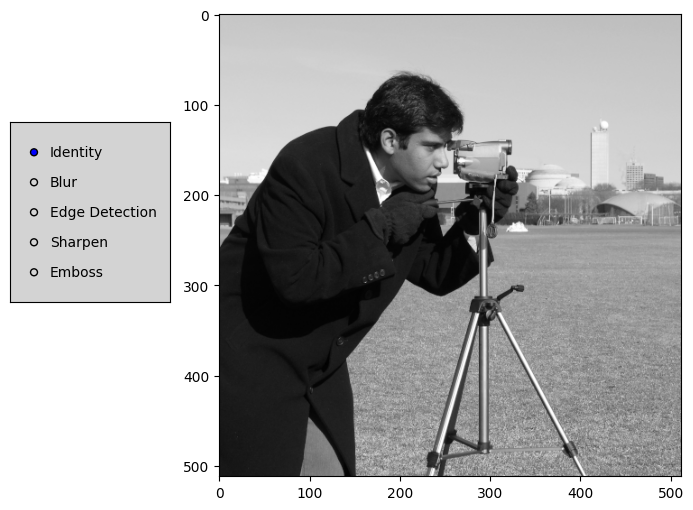

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as ndimage
from matplotlib.widgets import RadioButtons
from skimage import data

# Load an image from Matplotlib's sample data
original_image = data.camera()  # Replace with a local file if needed
image = np.array(original_image)

# Convert to grayscale if the image has 3 channels (RGB)
if image.ndim == 3:
    image = np.mean(image, axis=2)

# Define some common convolution filters
filters = {
    "Identity": np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
    "Blur": (1 / 9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]),
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
}

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.3)

# Display the original image
img_display = ax.imshow(image, cmap="gray")

# Create interactive buttons
ax_color = plt.axes([0.05, 0.4, 0.2, 0.3], facecolor='lightgray')
radio = RadioButtons(ax_color, list(filters.keys()))

def update_filter(label):
    """Apply the selected filter to the image."""
    kernel = filters[label]
    filtered_image = ndimage.convolve(image, kernel, mode="constant", cval=0.0)
    img_display.set_data(filtered_image)
    plt.draw()

radio.on_clicked(update_filter)

plt.show()

In [ ]:
import micropip
await micropip.install(["ipympl", 'plotly', 'scipy', 'jupyterquiz', 'jupytercards' ])

# Interactive Matplotlib plots with ipywidgets integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.ndimage import convolve
from skimage import data
from IPython.display import display

# Load a built-in grayscale image from skimage
original_image = data.camera()
image = np.array(original_image)

# UI Widgets
filter_dropdown = widgets.Dropdown(
    options=["Original", "Inverted", "Threshold", "Blur", "Edge Detection"],
    value="Edge Detection",
    description="Filter:"
)

# Additional controls
threshold_slider = widgets.IntSlider(min=0, max=255, step=1, value=127, description="Threshold")
blur_slider = widgets.IntSlider(min=1, max=15, step=2, value=3, description="Blur Strength")

# Grouping UI components
threshold_box = widgets.VBox([threshold_slider])
blur_box = widgets.VBox([blur_slider])

# Hide all additional options initially
threshold_box.layout.display = 'none'
blur_box.layout.display = 'none'

def update_visibility(change):
    """Update UI elements based on selected filter."""
    threshold_box.layout.display = 'block' if change['new'] == "Threshold" else 'none'
    blur_box.layout.display = 'block' if change['new'] == "Blur" else 'none'

filter_dropdown.observe(update_visibility, names='value')

ui = widgets.VBox([filter_dropdown, threshold_box, blur_box])

def process_image(filter_type, threshold=127, blur_strength=3, edge_sensitivity=1.0):
    """Processes the image based on selected filter type."""
    if filter_type == "Original":
        processed_img = apply_original(image)
    elif filter_type == "Inverted":
        processed_img = apply_inverted(image)
    elif filter_type == "Threshold":
        processed_img = apply_threshold(image, threshold)
    elif filter_type == "Blur":
        processed_img = apply_blur(image, blur_strength)
    elif filter_type == "Edge Detection":
        processed_img = apply_edge_detection(image, edge_sensitivity)

    # Display original and processed images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title("Original Image")
    
    axes[1].imshow(processed_img, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title(filter_type)
    
    plt.show()

def display_plot():
    output = widgets.interactive_output(process_image, {
        'filter_type': filter_dropdown,
        'threshold': threshold_slider,
        'blur_strength': blur_slider,
    })
    display(ui, output)

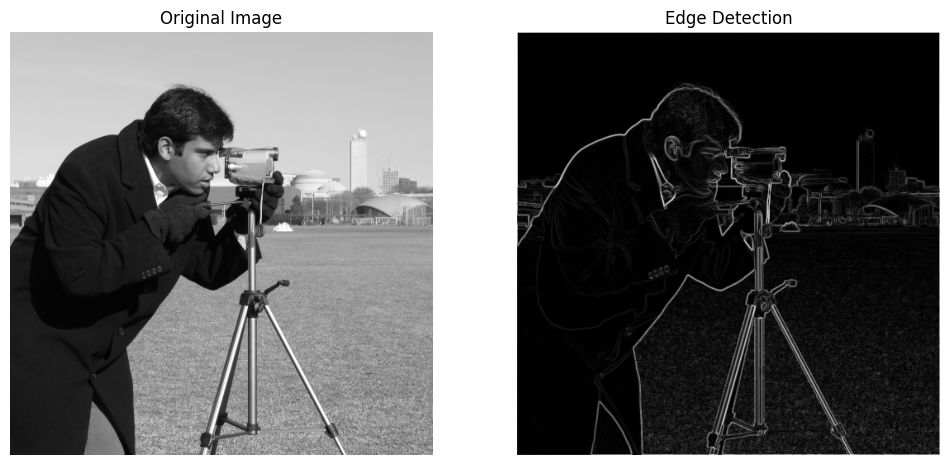

Output()

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.ndimage import convolve
from skimage import data
from IPython.display import display

# Define filter functions
def apply_original(img):
    return img

def apply_inverted(img):
    return 255 - img

def apply_threshold(img, threshold=127):
    return (img > threshold) * 255  # Binary thresholding

def apply_blur(img, kernel_size=3):
    if kernel_size < 1:
        return img
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    return convolve(img, kernel, mode='constant', cval=0)

def apply_edge_detection(img, sensitivity=1.0):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) * sensitivity
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) * sensitivity
    edge_x = convolve(img.astype(float), sobel_x, mode='constant', cval=0)
    edge_y = convolve(img.astype(float), sobel_y, mode='constant', cval=0)
    processed_img = np.sqrt(edge_x**2 + edge_y**2)
    processed_img = (processed_img / processed_img.max()) * 255  # Normalize
    return processed_img.astype(np.uint8)  # Ensure output is valid image format

# Removing below code will not render the plot
display_plot()

# Interactive JupyterQuiz integration

In [21]:
from jupyterquiz import display_quiz

github = 'https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'

file = '03-first-data/questions/4-summary-stats.json'

display_quiz(github+file, colors='fdsp')

<IPython.core.display.Javascript object>

# Plotly integration

In [3]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'iframe'

# Data for sunburst chart
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4]
)

# Create sunburst chart
fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)

# # Set figure size and center the plot
# fig.update_layout(
#     width=400,  # Set width
#     height=400,  # Set height
#     margin=dict(t=20, l=20, r=20, b=20),  # Reduce margins to center the figure
# )

fig.show()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



AttributeError: `np.unicode_` was removed in the NumPy 2.0 release. Use `np.str_` instead.

In [7]:
import plotly.graph_objects as go
import numpy as np

t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 25
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=[xx[0]], y=[yy[0]],
                     mode="markers",
                     marker=dict(color="red", size=10))])
fig.update_layout(width=600, height=450,
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Kinematic Generation of a Planar Curve", title_x=0.5,
        updatemenus = [dict(type = "buttons",
        buttons = [
            dict(
                args = [None, {"frame": {"duration": 10, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 10}}],
                label = "Play",
                method = "animate",

                )])])

fig.update(frames=[go.Frame(
                        data=[go.Scatter(
                                   x=[xx[k]],
                                   y=[yy[k]])],
                        traces=[1]) # fig.data[1] is updated by each frame
        for k in range(N)])

fig.show()

# Jupytercards integration for flashcards

In [23]:
from jupytercards import display_flashcards

file = '03-first-data/flashcards/hypothesis-testing.json'
github = 'https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'
display_flashcards(github+file)

<IPython.core.display.Javascript object>

# Testing interactive plots with plotly

In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import numpy as np
import cv2
import requests

# Set default renderer to ensure proper display
pio.renderers.default = "iframe"

# Download the image from the URL
image_url = "https://images.plot.ly/language-icons/api-home/python-logo.png"
response = requests.get(image_url)
image_bytes = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)

# Resize for better visualization
img = cv2.resize(img, (350, 350))  # Reduce size slightly for better layout

# Define image processing techniques
def process_image(img, method):
    if method == "None":
        return img
    elif method == "Grayscale":
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif method == "Edge Detection (Canny)":
        return cv2.Canny(img, 100, 200)
    elif method == "Gaussian Blur":
        return cv2.GaussianBlur(img, (5, 5), 0)
    elif method == "Thresholding":
        return cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)[1]
    return img

# Create processed images for each method
methods = ["None", "Grayscale", "Edge Detection (Canny)", "Gaussian Blur", "Thresholding"]
images = {method: process_image(img, method) for method in methods}

# Convert images to RGB (for Plotly display)
def convert_to_rgb(image):
    if len(image.shape) == 2:  # Grayscale images
        return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

images_rgb = {method: convert_to_rgb(images[method]) for method in methods}

# Create the subplot layout for input and output images
fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=("Original Image", "Processed Image"),
    horizontal_spacing=0.05  # Reduce spacing to fit within width
)

# Add the original image on the left
fig.add_trace(go.Image(z=images_rgb["None"]), row=1, col=1)

# Add the initial processed image on the right (Default: None)
fig.add_trace(go.Image(z=images_rgb["None"]), row=1, col=2)

# Add frames for animation (switching techniques)
frames = [
    go.Frame(
        data=[
            go.Image(z=images_rgb["None"]),  # Original image remains unchanged
            go.Image(z=images_rgb[method])  # Processed image updates
        ],
        name=method
    )
    for method in methods
]

fig.update(frames=frames)

# Make figure responsive within div
fig.update_layout(
    autosize=True,  # Makes it fit within container
    width=None,  # No fixed width, so it adapts
    height=450,  # Keep a balanced height
    updatemenus=[
        {
            "buttons": [
                {"label": method, "method": "animate", "args": [[method], {"mode": "immediate", "frame": {"duration": 0, "redraw": True}}]}
                for method in methods
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.5,
            "xanchor": "center",
            "y": 1.15,  # Push dropdown down slightly
            "yanchor": "top"
        }
    ],
    title="Interactive Image Processing",
    margin=dict(t=80, l=20, r=20, b=20),  # Reduce margins for a tighter fit
    annotations=[
        dict(x=0.2, y=1.05, text="Original Image", showarrow=False, font=dict(size=14), xanchor="center"),
        dict(x=0.8, y=1.05, text="Processed Image", showarrow=False, font=dict(size=14), xanchor="center")
    ]
)

# Show the interactive figure
fig.show()